In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!unzip 'drive/My Drive/women_shoes_data.zip'

Archive:  drive/My Drive/women_shoes_data.zip
  inflating: 7210_1.csv              


In [ ]:
#men_shoes = pd.read_csv('https://query.data.world/s/ucsj2mwxtt2inakri3735mtudy7u25')
women_shoes = pd.read_csv('7210_1.csv', low_memory=False)
#women_shoes_test = df = pd.read_csv('https://query.data.world/s/geopno3aqt6j2hih4n4ryo34j3vktt', low_memory=False) # Women Shoes jun_19

In [ ]:
women_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

In [ ]:
# women_shoes = women_shoes.drop(['quantities', 'prices.source', 'websiteIDs', 'isbn', 'prices.count', 'count', 'flavors', 'prices.warranty', 'asins','count','descriptions', 'ean', 'imageURLs', 'keys', 'manufacturerNumber', 
#                                 'name', 'prices.availability', 'prices.color', 'prices.condition', 'prices.count', 'prices.currency',
#                                 'prices.flavor', 'prices.merchant', 'prices.sourceURLs', 'prices.size', 'skus', 'sourceURLs', 'upc', 'weight'], axis = 1 )

In [ ]:
women_shoes.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,L,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,M,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,S,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,XL,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T0

In [ ]:
women_shoes.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

In [ ]:
women_shoes.shape

(33801, 52)

In [ ]:
data = women_shoes

In [ ]:
# Changing headers to lowercase
data.columns= map(str.lower, data.columns)

In [ ]:
data_null_table_df = pd.DataFrame(data.isnull().sum(axis=0),columns=['num_nulls'])

In [ ]:
data_null_table_df['feature_name'] = data_null_table_df.index
data_null_table_df['ratio_of_null'] = data_null_table_df['num_nulls']/data.shape[0]

In [ ]:
data_null_table_df.head(5)

,num_nulls,feature_name,ratio_of_null
id,0,id,0.000000
asins,31379,asins,0.928345
brand,984,brand,0.029112
categories,0,categories,0.000000
colors,13957,colors,0.412917


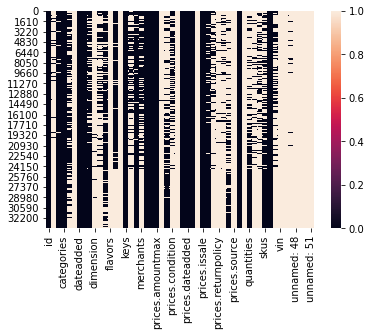

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull().astype('int'))

In [ ]:
threshold = 0.5
col2remove = data_null_table_df[data_null_table_df['ratio_of_null'] > threshold].index
col2remove

Index(['asins', 'count', 'dimension', 'ean', 'flavors', 'isbn', 'manufacturer',
       'merchants', 'prices.availability', 'prices.condition', 'prices.count',
       'prices.flavor', 'prices.offer', 'prices.returnpolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.warranty',
       'reviews', 'sizes', 'upc', 'vin', 'websiteids', 'weight', 'unnamed: 48',
       'unnamed: 49', 'unnamed: 50', 'unnamed: 51'],
      dtype='object')

In [ ]:
data_after_remove_df = data[[col for col in data.columns if col not in col2remove]]

In [ ]:
print("The data shape before %s and after %s "%(data.shape, data_after_remove_df.shape))

The data shape before (33801, 52) and after (33801, 24) 


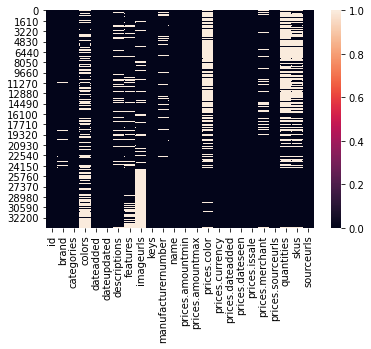

In [ ]:
sns.heatmap(data_after_remove_df.isnull().astype('int'))

In [ ]:
data = data_after_remove_df
#Dealing with the NaN
print("Null values per column:")
data.isnull().sum()

Null values per column:


id                        0
brand                   984
categories                0
colors                13957
dateadded                 0
dateupdated               0
descriptions           5376
features               6620
imageurls             11492
keys                      0
manufacturernumber     2367
name                      0
prices.amountmin          0
prices.amountmax          0
prices.color          16380
prices.currency           0
prices.dateadded          0
prices.dateseen           0
prices.issale             0
prices.merchant        3875
prices.sourceurls         0
quantities            15311
skus                  11666
sourceurls                0
dtype: int64

In [ ]:
data['colors2'] = data['features'].str.split('"key":"Color","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data['colors'] = data['colors'].fillna(data['colors2'])
data.drop('colors2', axis=1, inplace=True)
data['colors'] = data['colors'].str.lower()
data['colors'].isnull().sum()/33798*100

In [ ]:
data['colors'] = data['colors'].fillna('no color')

In [ ]:
data['brand'] = data['brand'].fillna('no brand')

In [ ]:
# brand names to change.

brand_map = {'a2 by aerosoles':'aerosoles', "what's what by aerosoles":'aerosoles',
'adidas outdoor':'adidas',
'adriana new york':'adriana',
'alexander mcqueen by puma':'puma', 'alexander mcqueen':'puma',
'alpine':'alpine swiss',
'anne klein ak':'anne klein', 'anne klein sport':'anne klein',
'annie shoes':'annie',
'athena':'athena alexander',
'babe.':'babe',
'baretraps':'bare traps',
'bcbg max azria':'bcbg', 'bcbg paris':'bcbg', 'bcbgeneration':'bcbg',
'beacon shoes':'beacon',
'bebe sport':'bebe', 'bebe stu':'bebe',
'belle by sigerson morrison':'belle', 'belle sigerson morrison':'belle',
'bernie mev':'bernie', 'bernie mev.':'bernie',
'bettye by bettye muller':'bettye muller', 'bettye by bettye muller ':'bettye muller',
"breckelle's":'breckelles',
'callaway footwear':'callaway',
'calvin klein ck':'calvin klein', 'calvin klein jeans':'calvin klein',
'carlos by carlos santana':'carlos santana',
'charles by charles david':'charels david',
'see by chloe':'chloe',
'clarks artisan':'clarks', 'clarks artisan collection':'clarks', 'clarks collection':'clarks',
'cobb hill by new balance':'new balance', 'cobb hill':'new balance',
'maria sharapova by cole haan': 'cole hann',
"corky's":'corkys', "corky's footwear":'corkys', "corkys footwear, inc.":'corkys',
'dearforms':'dearfoams', 'df by dearfoams':'dearfoams',
'derek lam 10 crosby':'derek lam',
'diba.true':'dibatrue',
'dolce&gabbana':'dolce and gabbana', 'dolce & gabbana':'dolce and gabbana', 'dolce by mojo moxy':'dolce and gabbana',
  'dolce vita':'dolce and gabbana', 'dv8 by dolce vita':'dolce and gabbana', 'dv by dolce vita':'dolce and gabbana',
"dr. scholl's":'dr scholls',
"dr. martens air wair":'drmartens',
'drew shoe':'drew',
'easy spirit e360':'easy spirit', 'easy spirit.':'easy spirit',
'ellie shoes':'ellie',
'emu australia':'emu',
'fergie footwear':'fergie',
'forever collectible':'forever', 'forever link':'forever', 'fourever funky':'forever',
'sarto by franco sarto':'franco sarto',
'ferriniusa':'ferrini',
'fitflop':'fit flop',
'funtasma by pleaser':'funtasma',
'g by guess':'guess',
'gc shoes':'gc',
'genuine grip footwear':'genuine grip',
"hogan by tod's":'hogan',
'soft style by hush puppies':'hush puppies',
'ilse jacobsen hornbaek':'ilse jacobson',
'isaacmizrahi':'isaac mizrahi',
'italian shoe makers':'italian comfort',
'j.renee':'j. renee',
'jbu by jambu':'jambu',
'josefseibel':'josef siebel',
'justin blair':'justin', 'justin boots':'justin', 'justin gypsy':'justin',
'kate spade new york':'kate spade',
'kenneth cole reaction':'kenneth cole', 'kenneth cole ny':'kenneth cole', 'kenneth cole new york':'kenneth cole',
 'unlisted kenneth cole':'kenneth cole',
'lamo sheepskin inc':'lamo',
'lifestride':'lifes tride',
'luoluo':'luo luo',
'marc fisher ltd':'marc fisher',
'mia heritage':'mia',
'micahel kors':'michael kors', 'michael michael kors':'michael kors',
'mobils by mephisto':'mephisto',
'top moda':'moda', 'moda essentials':'moda', 'everybody by bz moda':'moda',
'muk luks a la mode':'muk luks',
'munro american':'munro',
'naot footwear':'naot',
'new@titude':'new attitude', 'new@ttitude':'new attitude',
'nina originals':'nina',
'nine west vintage america collection':'nine west',
'nufoot���':'nufoot',
'pleaser shoes':'pleaser', 'pleaser usa, inc.':'pleaser', 'pleaserusa':'pleaser',
'rachel':'rachel roy', 'rachel rachel roy ':'rachel roy',
'lauren by ralph lauren':'ralph lauren', 'lauren ralph lauren':'ralph lauren', 'lauren lorraine':'ralph lauren',
 'polo ralph lauren':'ralph lauren','ralph lauren denim supply':'ralph lauren',
'rieker-antistress':'rieker',
'rocket dog brands llc':'rocket dog',
'sanita clogs':'sanita',
'ferragamo':'salvatore ferragamo',
'skechers usa':'skechers',
'sperry top sider':'sperry', 'sperry top-sider':'sperry',
"l'artiste by spring step":'spring step', "flexus by spring step":'spring step', "patrizia by spring step ":'spring step',
 "patrizia pepe":'spring step', "patrizia":'spring step',
'steven steve madden':'steve madden',
'style & co.':'style and co',
'timberland earthkeepers':'timberland', 'timberland pro':'timberland',
'toms shoes':'toms',
'tony lama boot co.':'tony lama',
'totes isotoner':'totes',
'trotter':'trotters',
'ugg australia':'ugg',
'famous name brand':'unbranded', 'generic':'unbranded', 'generic surplus':'unbranded', 'non-branded':'unbranded',
 'not applicable':'unbranded', 'not rated':'unbranded', 'lucky  brand':'unbranded', 'lucky brand':'unbranded',
 'very fine dance shoes':'unbranded',
'valentino noir':'valentino',
'victoria k.':'victoria',
'vince camuto':'vince',
'vionic by orthaheel':'vionic', 'vionic with orthaheel technology':'vionic',
'elites by walking cradles':'walking cradles', 'elites':'walking cradles','mark lemp by walking cradles':'walking cradles',
 'rose petals by walking cradles':'walking cradles', 'the walking cradle company':'walking cradles'
}

In [ ]:
# create a new column with corrected brand names.

data['brand_clean'] = data['brand'].replace(brand_map)
data['brand_clean'].head()

In [ ]:
# Deleting data not associated to shoe brands
del_brand = ['1 world sarongs', 'mirage pet products', 'timeless toys'] # to delete
data = data[~data['brand'].isin(del_brand)]

In [ ]:
#Checking shoe price via brand
data.groupby('brand')['prices.amountmax'].mean().sort_values(ascending=False).head(10)

brand
JewelsObsession        3322.190000
Teva                   1355.578000
Valentino              1186.998000
Simone Rocha           1120.000000
MALONE SOULIERS        1100.000000
Nicholas Kirkwood      1095.000000
Marni                   963.333333
Paul Andrew             895.000000
Stella McCartney        885.000000
Christian Louboutin     867.333333
Name: prices.amountmax, dtype: float64

In [ ]:
# Jewellery Shoe brand, prices of such shoes are extreme outliers to the general shoe price
data = data[~(data['brand']=='jewelsobsession')]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33801 entries, 0 to 33800
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33801 non-null  object 
 1   brand               33801 non-null  object 
 2   categories          33801 non-null  object 
 3   colors              33801 non-null  object 
 4   dateadded           33801 non-null  object 
 5   dateupdated         33801 non-null  object 
 6   descriptions        28425 non-null  object 
 7   features            27181 non-null  object 
 8   imageurls           22309 non-null  object 
 9   keys                33801 non-null  object 
 10  manufacturernumber  31434 non-null  object 
 11  name                33801 non-null  object 
 12  prices.amountmin    33801 non-null  float64
 13  prices.amountmax    33801 non-null  float64
 14  prices.color        17421 non-null  object 
 15  prices.currency     33801 non-null  object 
 16  pric

In [ ]:
 #Average price of shoes
data['prices.amountavg']= (data['prices.amountmin']+ data['prices.amountmax'])/2
print(data['prices.amountavg'].head(15))

0      62.99
1      62.99
2      62.99
3      62.99
4      62.99
5      62.99
6      56.69
7      30.00
8     100.00
9      25.99
10     10.00
11      8.00
12     70.00
13     89.00
14     55.99
Name: prices.amountavg, dtype: float64


In [ ]:
data[['prices.amountmin','prices.amountavg','prices.amountmax']].describe()

,prices.amountmin,prices.amountavg,prices.amountmax
count,33801.000000,33801.000000,33801.000000
mean,87.655798,88.303038,88.950277
std,146.158393,147.504127,151.579682
min,0.010000,0.010000,0.010000
25%,33.990000,34.190000,34.390000
50%,52.990000,53.160000,53.560000
75%,89.000000,89.950000,89.950000
max,4270.000000,4270.000000,5200.000000


In [ ]:
# Dropping unneccessary columns
data = data.drop(['descriptions', 'skus', 'imageurls', 'sourceurls', 'manufacturernumber', 'prices.sourceurls', 'quantities'], axis = 1)

In [ ]:
data.columns

Index(['id', 'brand', 'categories', 'colors', 'dateadded', 'dateupdated',
       'features', 'keys', 'name', 'prices.amountmin', 'prices.amountmax',
       'prices.color', 'prices.currency', 'prices.dateadded',
       'prices.dateseen', 'prices.issale', 'prices.merchant', 'brand_clean',
       'prices.amountavg'],
      dtype='object')

In [ ]:
data.head().T

,0,1,2,3,4
id,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H
brand,Novica,Novica,Novica,Novica,Novica
categories,"Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing"
colors,purple,purple,purple,purple,purple
dateadded,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z
dateupdated,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z
features,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W..."
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...
name,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Handcrafted Alpaca Blend 'Purple Charisma' Swe...
prices.amountmin,62.99,62.99,62.99,62.99,62.99


In [ ]:
data.shape

(33801, 19)

In [ ]:
# Checking the currency 
data['prices.currency'].value_counts()

USD    32680
CAD     1008
EUR      101
AUD       11
GBP        1
Name: prices.currency, dtype: int64

In [ ]:
# Keeping data with only 'USD' currency
data = data[data['prices.currency']=='USD']
data['prices.currency'].value_counts()

USD    32680
Name: prices.currency, dtype: int64

In [ ]:
data['prices.amountmax'].describe()

count    32680.000000
mean        88.240367
std        146.657391
min          0.010000
25%         33.990000
50%         51.990000
75%         89.000000
max       4198.990000
Name: prices.amountmax, dtype: float64

The average shoe price is 88 dollars, the median 52 


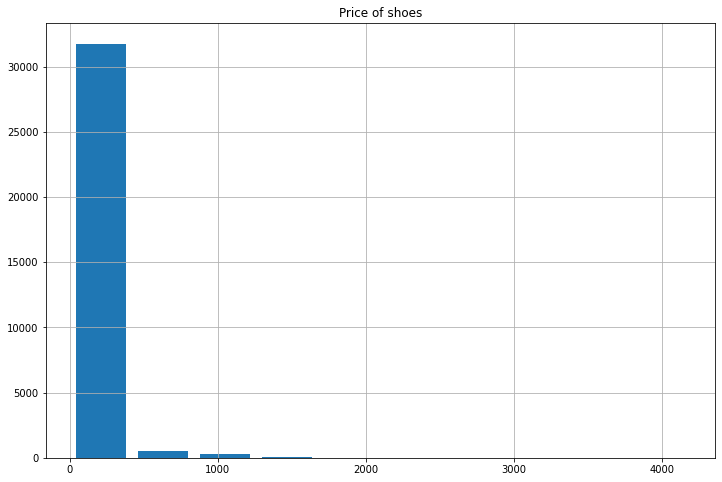

In [ ]:
# How expensive are shoes
print('The average shoe price is {:,.0f} dollars, the median {:,.0f} '.format(
    data['prices.amountmax'].mean(), data['prices.amountmax'].median()))

data['prices.amountmax'].hist(bins=10, rwidth=.8, figsize=(12,8))
plt.title('Price of shoes')
plt.show()

(array([15664., 10365.,  3573.,  1493.,   292.,   169.,    47.,   150.,
           23.,    29.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

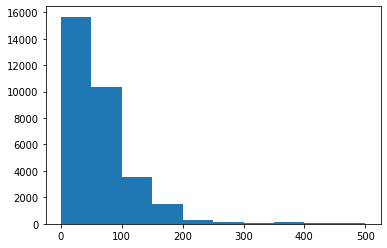

In [ ]:
plt.hist(data['prices.amountmax'], bins = 10, range=(0,500))

In [ ]:
data['prices.amountavg'].describe()

count    32680.000000
mean        87.785046
std        146.498374
min          0.010000
25%         33.990000
50%         51.990000
75%         88.950000
max       4198.990000
Name: prices.amountavg, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


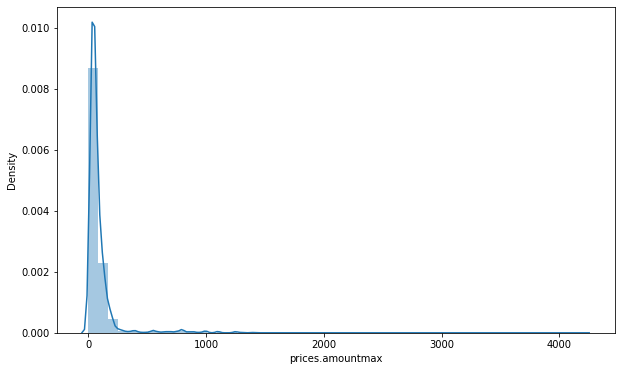

In [ ]:
# price distribution plot
plt.figure(figsize=(10,6))
sns.distplot(data['prices.amountmax'])
plt.show()

In [ ]:
# Checking the brand names and their value counts 
data.groupby(['brand']).size().head(15)

brand
1 World Sarongs         23
143 GIRL                 5
143 Girl                 3
2 Lips Too              21
361                      1
79 SCII                  1
90 Degree by Reflex      1
A'rcopedico              2
A2 BY AEROSOLES          2
A2 By Aerosoles          6
A2 by Aerosoles        188
ADI                     21
AGL                     11
AMALFI BY RANGONI        4
ANNE KLEIN SPORT         7
dtype: int64

In [ ]:
data.dtypes

id                   object
brand                object
categories           object
colors               object
dateadded            object
dateupdated          object
features             object
keys                 object
name                 object
prices.amountmin    float64
prices.amountmax    float64
prices.color         object
prices.currency      object
prices.dateadded     object
prices.dateseen      object
prices.issale          bool
prices.merchant      object
brand_clean          object
prices.amountavg    float64
dtype: object

In [ ]:
counts=data['brand'].value_counts()
counts.head(10)

Journee Collection    1401
Ralph Lauren           991
Skechers               799
Propet                 796
Nike                   649
Novica                 574
Easy Spirit            487
TOMS                   408
Drew                   387
Soft Style             365
Name: brand, dtype: int64

In [ ]:
# brands sold more than 100 pair of shoes
nbrand=counts[counts>=100]
nbrand.head()

Journee Collection    1401
Ralph Lauren           991
Skechers               799
Propet                 796
Nike                   649
Name: brand, dtype: int64

In [ ]:
saledf= data['prices.issale']
saledf.head()

0    False
1    False
2    False
3    False
4     True
Name: prices.issale, dtype: bool

In [ ]:
# Removing spam samples
import re
idx_notshoe = data['features'].str.contains("socks|speaker|bluetooth|microphone|phone|india|patiala|cotton|wool|kid|junior|\
                            sweater|shirt|blouse|pedicure|kurta|kurti|tunic|handbag|bag|tote bag|purse|dress|legging|\
                            chain|hair accessories|hair clip|hair|claw|hair clamp|watch|bracelet|skirt|denim|sweatshirt|\
                            hoodie|top|sundress|robe|halloween|costume|pant|suit",
                                           flags=re.IGNORECASE)
idx_notshoe.fillna(False, inplace=True)
data = data.loc[~idx_notshoe,:]

In [ ]:
#creating a new column with boolean values.Shoes priced over $100 is expensive,under 100 is affordable.
data['price.stat']=(data['prices.amountmax']>100)
data.head().T

,7,10,11,19,20
id,AVpe__JXilAPnD_xSt3F,AVpe_0ob1cnluZ0-bnWr,AVpe_0ob1cnluZ0-bnWr,AVpe_1KTilAPnD_xSqVK,AVpe_1KTilAPnD_xSqVK
brand,Pedi Couture,BEAUTIFEET,BEAUTIFEET,INC International Concepts,INC International Concepts
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes"
colors,blue snake,"multicolor,multi","multicolor,multi",green,green
dateadded,2016-11-10T09:13:23Z,2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z
dateupdated,2016-11-10T09:13:23Z,2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z
features,"[{""key"":""Assembled Product Dimensions (L x W x...","[{""key"":""Recommended Use"",""value"":[""NOT STATED...","[{""key"":""Recommended Use"",""value"":[""NOT STATED...","[{""key"":""Material"",""value"":[""Suede""]},{""key"":""...","[{""key"":""Material"",""value"":[""Suede""]},{""key"":""..."
keys,"83,961,324,637,083,900,000,000","096506461056,0096506461056,sofcomfortwomenseve...","096506461056,0096506461056,sofcomfortwomenseve...","689439746217,0689439746217,incinternationalcon...","689439746217,0689439746217,incinternationalcon..."
name,Pedi Couture Women's Blue Snake Pedicure Spa T...,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Sof Comfort Women's Everyday Gel Insoles, 2-pair",Inc International Concepts Britanii Pointed ...,Inc International Concepts Britanii Pointed ...
prices.amountmin,30,10,8,90,39.99


In [ ]:
data['Gender'] = data['features'].str.split('"key":"Gender","value":\["',
                                         expand=True)[1].str.split('"\]}',
                                                                   expand=True, n=1)[0]
data['Gender'].unique()

array(['Women', None, nan, 'Unisex', 'Men', 'Female', 'Womens', 'Boys',
       'Men","Women', 'Girls', 'Women","Men', "Women's", 'Female","Women'],
      dtype=object)

In [ ]:
# Since this data frame deals with just women shoes data
data = data[(data['Gender']!='Boys')]
data = data[(data['Gender']!='Men')]

In [ ]:
# Removing descriptive columns after extracting valuable features
data.drop(['features', 'keys', 'Gender', 'name'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 7 to 33800
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25976 non-null  object 
 1   brand             25976 non-null  object 
 2   categories        25976 non-null  object 
 3   colors            25976 non-null  object 
 4   dateadded         25976 non-null  object 
 5   dateupdated       25976 non-null  object 
 6   prices.amountmin  25976 non-null  float64
 7   prices.amountmax  25976 non-null  float64
 8   prices.color      16004 non-null  object 
 9   prices.currency   25976 non-null  object 
 10  prices.dateadded  25976 non-null  object 
 11  prices.dateseen   25976 non-null  object 
 12  prices.issale     25976 non-null  bool   
 13  prices.merchant   22859 non-null  object 
 14  brand_clean       25976 non-null  object 
 15  prices.amountavg  25976 non-null  float64
 16  price.stat        25976 non-null  bool  

In [ ]:
data.head().T

,7,10,11,19,20
id,AVpe__JXilAPnD_xSt3F,AVpe_0ob1cnluZ0-bnWr,AVpe_0ob1cnluZ0-bnWr,AVpe_1KTilAPnD_xSqVK,AVpe_1KTilAPnD_xSqVK
brand,Pedi Couture,BEAUTIFEET,BEAUTIFEET,INC International Concepts,INC International Concepts
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes","Shoes,Women's Shoes,Clothing,All Women's Shoes"
colors,blue snake,"multicolor,multi","multicolor,multi",green,green
dateadded,2016-11-10T09:13:23Z,2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z
dateupdated,2016-11-10T09:13:23Z,2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z
prices.amountmin,30,10,8,90,39.99
prices.amountmax,30,10,8,90,39.99
prices.color,NaN,NaN,NaN,NaN,NaN
prices.currency,USD,USD,USD,USD,USD


In [ ]:
import re
data['isBoots'] = data['categories'].str.contains("Boot|calf",
                                              flags=re.IGNORECASE
                                             ).map(lambda x:1 if(x==True) else 0)
data['isBoots'].value_counts(normalize=True)

0    0.785148
1    0.214852
Name: isBoots, dtype: float64

In [ ]:
data['isBooties'] = data['categories'].str.contains("booties|bootie|heel|wedge|pump|Stiletto",
                                                flags=re.IGNORECASE
                                               ).map(lambda x:1 if(x==True) else 0)
data['isBooties'].value_counts(normalize=True)

0    0.779489
1    0.220511
Name: isBooties, dtype: float64

In [ ]:
data['isSandal'] = data['categories'].str.contains("sandal|gladiator|flip|flop|slipper|slide",
                                                flags=re.IGNORECASE
                                                ).map(lambda x:1 if(x==True) else 0)
data['isSandal'].value_counts(normalize=True)

0    0.853673
1    0.146327
Name: isSandal, dtype: float64

In [ ]:
data['isAthletic'] = data['categories'].str.contains("athletic|basketball|golf|sport|run|running|trainin|gym|fitness|climb|\
                                    soccer|outdoor|hiking|hike|skecher|balance|fila|asics|Easy Spirit|trainer|adidas|puma|\
                                    reebok|nike",
                                                 flags=re.IGNORECASE
                                                 ).map(lambda x:1 if(x==True) else 0)
data['isAthletic'].value_counts(normalize=True)

0    0.929435
1    0.070565
Name: isAthletic, dtype: float64

In [ ]:
data['isCasual'] = data['categories'].str.contains("casual|contemporary|sneaker|slip-on|clog|round|toe|converse|canvas|mule|\
                                    moccasin|flat|Bahama|espadrille|loafer",
                                                 flags=re.IGNORECASE
                                                 ).map(lambda x:1 if(x==True) else 0)
data['isCasual'].value_counts(normalize=True)

data['isDesigner'] = data['categories'].str.contains("design",
                                                 flags=re.IGNORECASE
                                                 ).map(lambda x:1 if(x==True) else 0)
data['isDesigner'].value_counts(normalize=True)

data['isLeather'] = data['categories'].str.contains("leather|pu|patent",
                                                 flags=re.IGNORECASE
                                                 ).map(lambda x:1 if(x==True) else 0)
data['isLeather'].value_counts(normalize=True)

typeofshoe = ['isBoots', 'isBooties', 'isSandal', 'isAthletic', 'isCasual', 'isDesigner', 'isLeather']

data['isOther'] = (data[typeofshoe].sum(axis=1)).map(lambda x:1 if(x==0) else 0)
data['isOther'].value_counts(normalize=True)



0    0.776486
1    0.223514
Name: isOther, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 7 to 33800
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25976 non-null  object 
 1   brand             25976 non-null  object 
 2   categories        25976 non-null  object 
 3   colors            25976 non-null  object 
 4   dateadded         25976 non-null  object 
 5   dateupdated       25976 non-null  object 
 6   prices.amountmin  25976 non-null  float64
 7   prices.amountmax  25976 non-null  float64
 8   prices.color      16004 non-null  object 
 9   prices.currency   25976 non-null  object 
 10  prices.dateadded  25976 non-null  object 
 11  prices.dateseen   25976 non-null  object 
 12  prices.issale     25976 non-null  bool   
 13  prices.merchant   22859 non-null  object 
 14  brand_clean       25976 non-null  object 
 15  prices.amountavg  25976 non-null  float64
 16  price.stat        25976 non-null  bool  

In [ ]:
data.head()

,id,brand,categories,colors,dateadded,dateupdated,prices.amountmin,prices.amountmax,prices.color,prices.currency,prices.dateadded,prices.dateseen,prices.issale,prices.merchant,brand_clean,prices.amountavg,price.stat,isBoots,isBooties,isSandal,isAthletic,isCasual,isDesigner,isLeather,isOther
7,AVpe__JXilAPnD_xSt3F,Pedi Couture,"Clothing,Shoes,Women's Shoes,All Women's Shoes",blue snake,2016-11-10T09:13:23Z,2016-11-10T09:13:23Z,30.00,30.00,NaN,USD,2016-11-10T09:13:23Z,2016-11-09T00:00:00Z,False,Big Deal Hunter - Walmart.com,Pedi Couture,30.00,False,0,0,0,0,0,0,0,1
10,AVpe_0ob1cnluZ0-bnWr,BEAUTIFEET,"Shoes,Women's Shoes,Clothing,All Women's Shoes","multicolor,multi",2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,10.00,10.00,NaN,USD,2016-11-04T03:11:11Z,2016-11-03T00:00:00Z,False,Walmart store - Walmart.com,BEAUTIFEET,10.00,False,0,0,0,0,0,0,0,1
11,AVpe_0ob1cnluZ0-bnWr,BEAUTIFEET,"Shoes,Women's Shoes,Clothing,All Women's Shoes","multicolor,multi",2016-11-04T03:11:11Z,2016-11-04T03:11:11Z,8.00,8.00,NaN,USD,2016-11-04T03:11:11Z,2015-11-03T00:00:00Z,False,Walmart store - Walmart.com,BEAUTIFEET,8.00,False,0,0,0,0,0,0,0,1
19,AVpe_1KTilAPnD_xSqVK,INC International Concepts,"Shoes,Women's Shoes,Clothing,All Women's Shoes",green,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z,90.00,90.00,NaN,USD,2016-10-27T04:25:08Z,2016-10-25T00:00:00Z,False,ApparelSave - Walmart.com,INC International Concepts,90.00,False,0,0,0,0,0,0,0,1
20,AVpe_1KTilAPnD_xSqVK,INC International Concepts,"Shoes,Women's Shoes,Clothing,All Women's Shoes",green,2016-10-27T04:25:08Z,2016-10-27T04:25:08Z,39.99,39.99,NaN,USD,2016-10-27T04:25:08Z,2016-10-25T00:00:00Z,True,NaN,INC International Concepts,39.99,False,0,0,0,0,0,0,0,1


In [ ]:
data.describe(include = 'all')

,id,brand,categories,colors,dateadded,dateupdated,prices.amountmin,prices.amountmax,prices.color,prices.currency,prices.dateadded,prices.dateseen,prices.issale,prices.merchant,brand_clean,prices.amountavg,price.stat,isBoots,isBooties,isSandal,isAthletic,isCasual,isDesigner,isLeather,isOther
count,25976,25976,25976,25976,25976,25976,25976.000000,25976.000000,16004,25976,25976,25976,25976,22859,25976,25976.000000,25976,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
unique,6430,1116,734,1189,4864,4234,NaN,NaN,1920,1,5417,4328,2,232,1114,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AVpfiLB71cnluZ0-mdRy,Journee Collection,"Clothing,Shoes,Women's Shoes,All Women's Shoes",no color,2017-03-28T11:43:08Z,2017-03-28T11:42:28Z,NaN,NaN,UWomen's 9 M (Regular),USD,2017-03-28T11:42:28Z,2015-08-11T00:00:00Z,False,Overstock.com,Journee Collection,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,79,1401,1734,8871,253,415,NaN,NaN,603,25976,412,843,22166,16315,1401,NaN,20095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,95.362259,96.474764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.918512,NaN,0.214852,0.220511,0.146327,0.070565,0.198298,0.003542,0.015938,0.223514
std,NaN,NaN,NaN,NaN,NaN,NaN,161.445045,161.577853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.424508,NaN,0.410728,0.414599,0.353441,0.256102,0.398726,0.059408,0.125237,0.416608
min,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,34.390000,34.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.950000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.950000,54.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,94.950000,97.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.992500,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data.drop(['categories', 'prices.dateadded', 'prices.dateseen', 'prices.currency'], axis = 1, inplace = True)

Converting 'dateupdated' column from 'object' to 'datetime' dtype

In [ ]:
data['datetime'] = data['dateupdated'].apply(lambda x : pd.to_datetime(str(x)))

In [ ]:
data['datetime']

7       2016-11-10 09:13:23+00:00
10      2016-11-04 03:11:11+00:00
11      2016-11-04 03:11:11+00:00
19      2016-10-27 04:25:08+00:00
20      2016-10-27 04:25:08+00:00
                   ...           
33759   2017-03-28 11:45:22+00:00
33760   2017-03-28 11:45:22+00:00
33761   2017-03-28 11:45:22+00:00
33799   2017-04-13 20:44:29+00:00
33800   2017-04-13 20:41:27+00:00
Name: datetime, Length: 25976, dtype: datetime64[ns, UTC]

In [ ]:
import datetime

# this line converts the string object in Timestamp object
#data['datetime'] = [datetime.datetime.strptime(d, "%Y-%m-%d %S:%M:H%") for d in data["datetime"]]

# extracting date from timestamp
data['Date'] = [datetime.datetime.date(d) for d in data['datetime']] 

# extracting time from timestamp
data['Time'] = [datetime.datetime.time(d) for d in data['datetime']] 

In [ ]:
data['Date']

7        2016-11-10
10       2016-11-04
11       2016-11-04
19       2016-10-27
20       2016-10-27
            ...    
33759    2017-03-28
33760    2017-03-28
33761    2017-03-28
33799    2017-04-13
33800    2017-04-13
Name: Date, Length: 25976, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 7 to 33800
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                25976 non-null  object             
 1   brand             25976 non-null  object             
 2   colors            25976 non-null  object             
 3   dateadded         25976 non-null  object             
 4   dateupdated       25976 non-null  object             
 5   prices.amountmin  25976 non-null  float64            
 6   prices.amountmax  25976 non-null  float64            
 7   prices.color      16004 non-null  object             
 8   prices.issale     25976 non-null  bool               
 9   prices.merchant   22859 non-null  object             
 10  brand_clean       25976 non-null  object             
 11  prices.amountavg  25976 non-null  float64            
 12  price.stat        25976 non-null  bool               
 13  i

In [ ]:
data.drop(['dateadded', 'dateupdated', 'prices.color', 'Time', 'date'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 7 to 33800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                25976 non-null  object             
 1   brand             25976 non-null  object             
 2   colors            25976 non-null  object             
 3   prices.amountmin  25976 non-null  float64            
 4   prices.amountmax  25976 non-null  float64            
 5   prices.issale     25976 non-null  bool               
 6   prices.merchant   22859 non-null  object             
 7   brand_clean       25976 non-null  object             
 8   prices.amountavg  25976 non-null  float64            
 9   price.stat        25976 non-null  bool               
 10  isBoots           25976 non-null  int64              
 11  isBooties         25976 non-null  int64              
 12  isSandal          25976 non-null  int64              
 13  i

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 7 to 33800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                25976 non-null  object             
 1   brand             25976 non-null  object             
 2   colors            25976 non-null  object             
 3   prices.amountmin  25976 non-null  float64            
 4   prices.amountmax  25976 non-null  float64            
 5   prices.issale     25976 non-null  bool               
 6   prices.merchant   22859 non-null  object             
 7   brand_clean       25976 non-null  object             
 8   prices.amountavg  25976 non-null  float64            
 9   price.stat        25976 non-null  bool               
 10  isBoots           25976 non-null  int64              
 11  isBooties         25976 non-null  int64              
 12  isSandal          25976 non-null  int64              
 13  i

<Figure size 1000x1500 with 0 Axes>

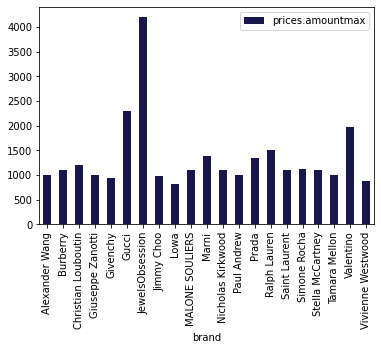

In [ ]:
#Price by brand
most_expensive = data.sort_values(by='prices.amountmax', ascending=False).head(500) # .tail(100)
plt.figure(figsize=(10,15), dpi=100, facecolor='w', edgecolor='k')
most_expensive[['brand','prices.amountmax']].groupby('brand').agg('max').plot(kind='bar', color=sns.color_palette('CMRmap',12))

In [ ]:
brand_cnt = data['brand'].value_counts() > 150
plt.hist(brand_cnt)

In [ ]:
data.to_csv('clean_women_shoes_data.csv')